<a href="https://colab.research.google.com/github/vmjs1234/ADVANCED_DIMENSIONALITY_REDUCTION/blob/main/IMAGE/Dimensionality_Reduction_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install umap-learn plotly --quiet
!pip install tensorflow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


In [2]:

# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px


In [3]:

from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE, MDS
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.datasets import load_digits
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [4]:

# Load the dataset
data = load_digits()
X = data.data
y = data.target


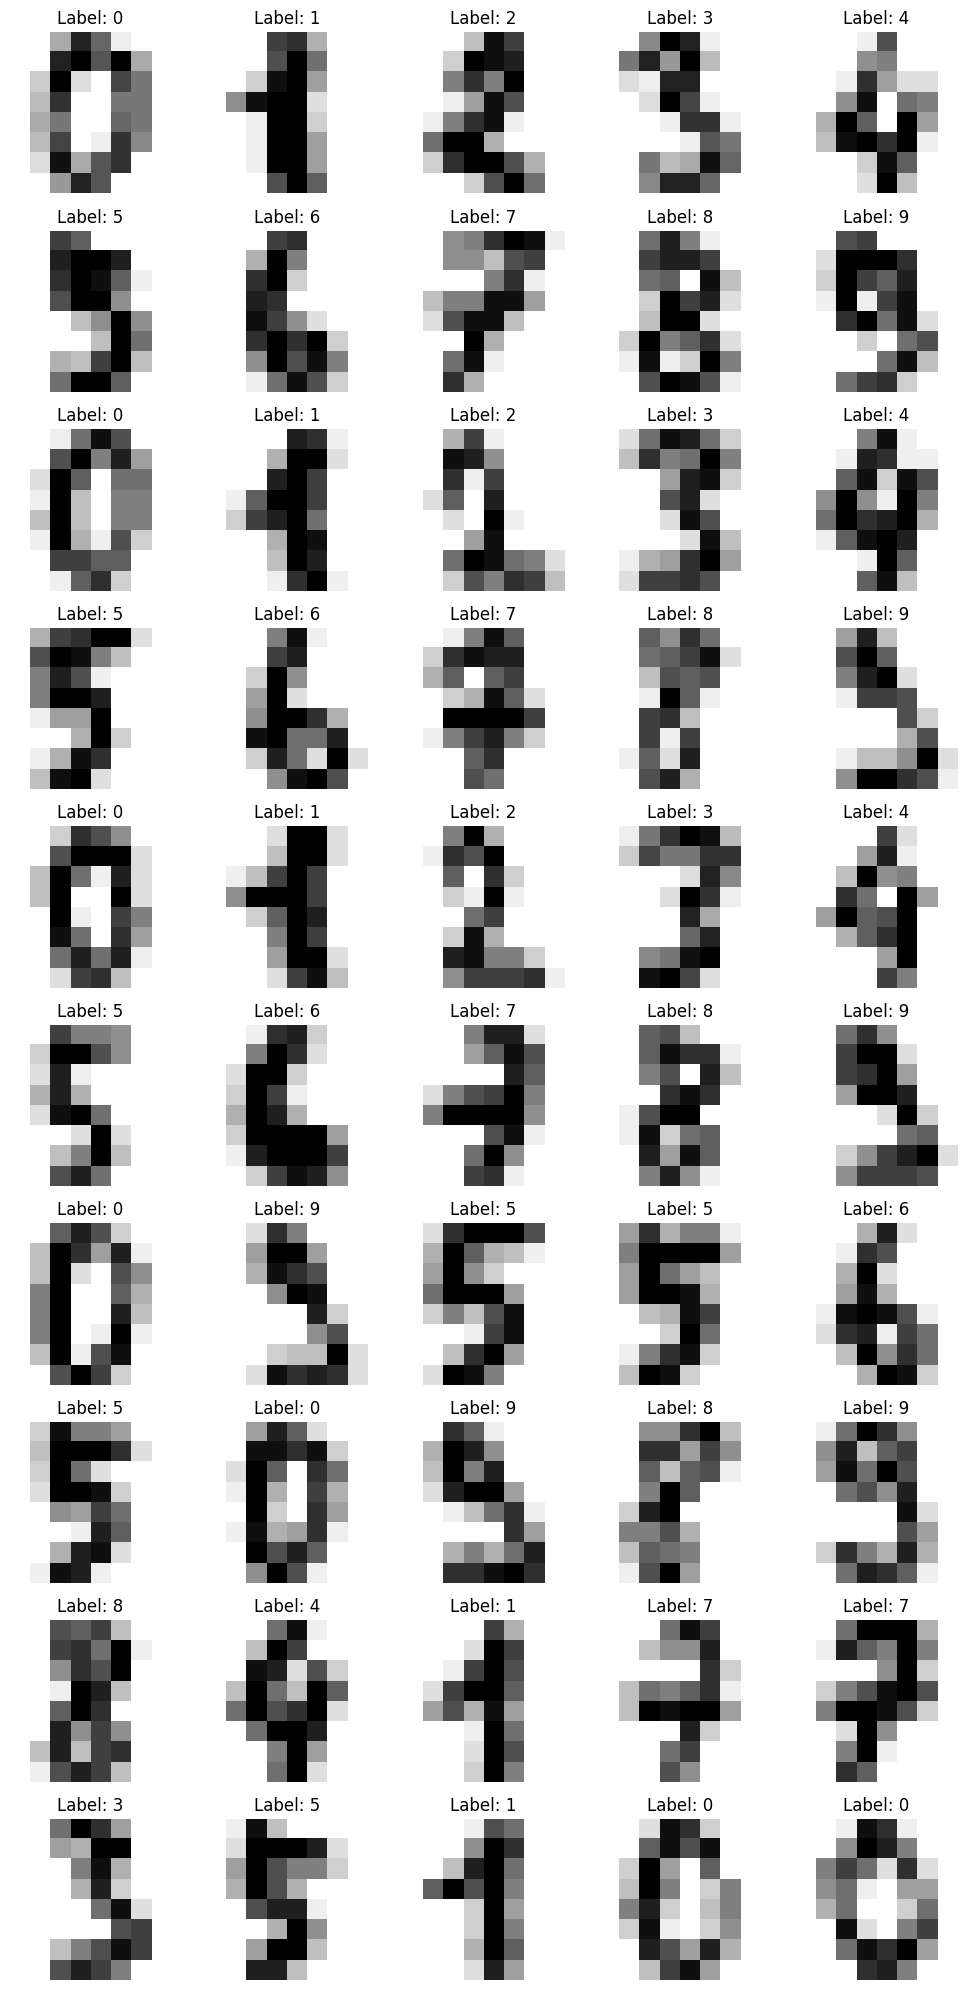

In [16]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE, MDS
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.datasets import load_digits
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# Install necessary libraries
# !pip install umap-learn plotly --quiet #already installed
# !pip install tensorflow --quiet #already installed


# Import libraries
%matplotlib inline




# Load the dataset
data = load_digits()
X = data.data
y = data.target

# Display sample images in a 10x5 grid
fig, axes = plt.subplots(10, 5, figsize=(10, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary')
    ax.set_title(f"Label: {data.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:

# Helper function for static visualization
def plot_2D(X_transformed, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='Spectral', s=15)
    plt.colorbar(scatter)
    plt.title(title, fontsize=16)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [7]:

# Helper function for interactive visualization
def plot_interactive(X_transformed, y, title):
    fig = px.scatter(x=X_transformed[:, 0], y=X_transformed[:, 1], color=y.astype(str),
                     title=title, labels={'x': 'Component 1', 'y': 'Component 2'})
    fig.show()


Locally Linear Embedding (LLE):

Captures the local neighborhood relationships effectively and maintains the geometry of the manifold.
Works well for data with non-linear structures.
Limitations: Sensitive to noise and requires a careful selection of the number of neighbors.

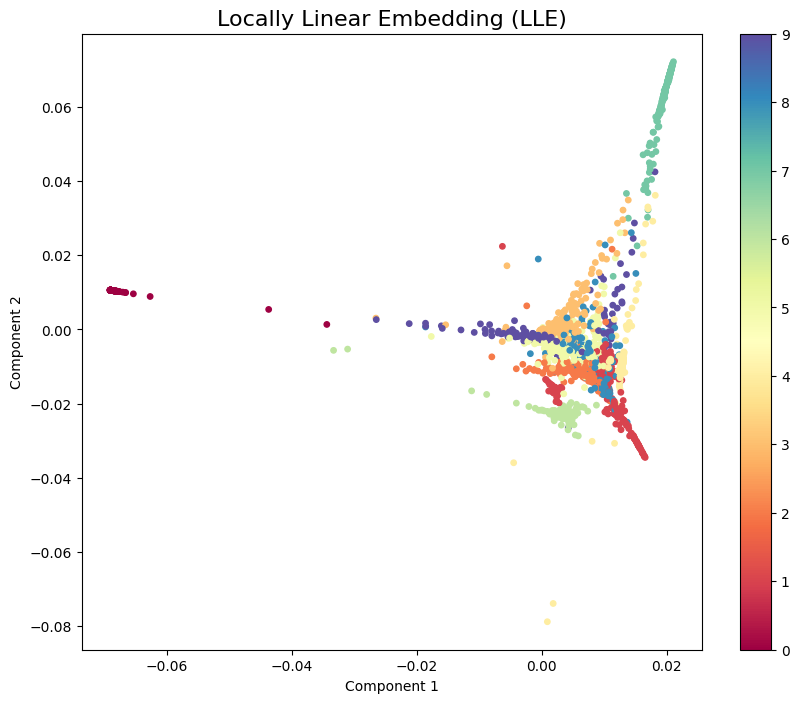

In [8]:

# 1. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_scaled)
plot_2D(X_lle, y, "Locally Linear Embedding (LLE)")


t-SNE:

Excellent for high-dimensional data visualization.
Captures clusters well, showing the separation of the digits distinctly.
Limitations: Computationally expensive, and the perplexity parameter affects results significantly.
Visualization in interactive mode (using Plotly) adds further clarity to how clusters are distributed.

In [9]:

# 2. t-SNE with interactive visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
plot_interactive(X_tsne, y, "t-SNE Interactive Visualization")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Isomap:

Preserves global structure while capturing the geometry of the manifold.
Performs well when the intrinsic structure of the data is non-linear.
The method is computationally less intensive than t-SNE.

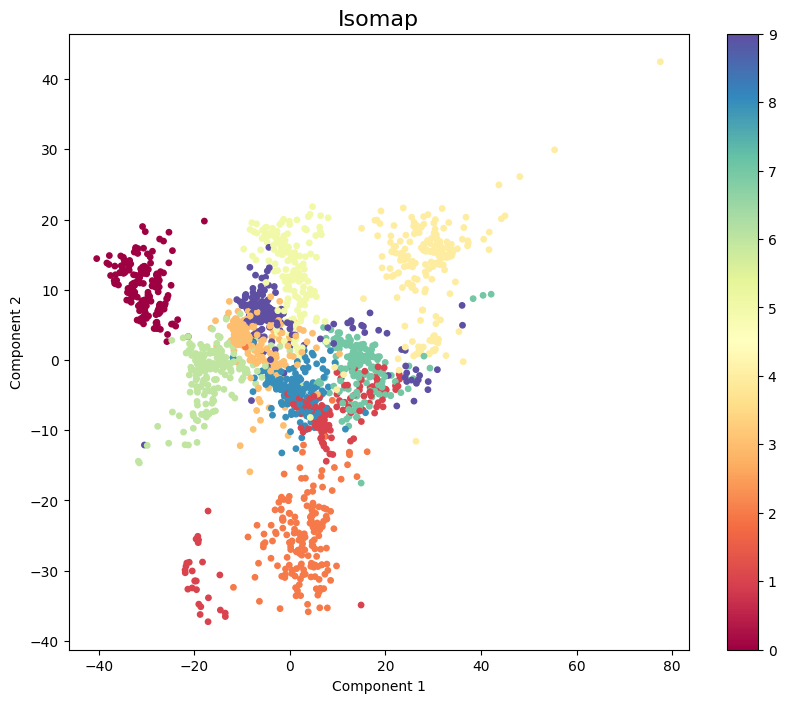

In [10]:

# 3. ISOMAP
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)
plot_2D(X_isomap, y, "Isomap")


UMAP:

Similar to t-SNE but faster and better at preserving both local and global structure.
Produces visually distinct clusters in a reduced dimensional space.
Interactive visualizations make UMAP results more interpretable.

In [11]:

# 4. UMAP with interactive visualization
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)
plot_interactive(X_umap, y, "UMAP Interactive Visualization")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Multi-Dimensional Scaling (MDS):

Preserves pairwise distances, providing a global view of the data.
Less effective than t-SNE or UMAP for clustering but still useful for understanding global relationships.

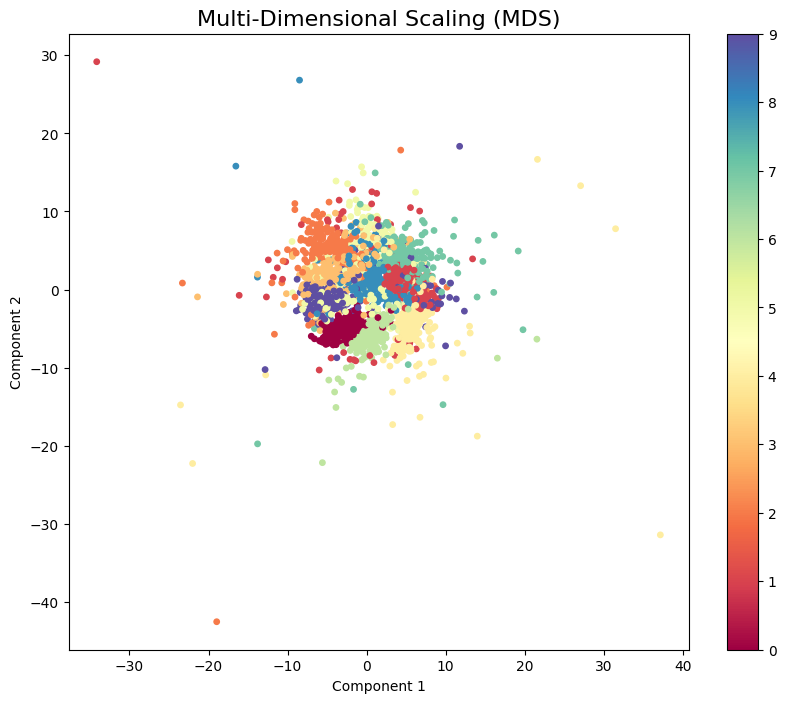

In [17]:

# 5. Multi-Dimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
plot_2D(X_mds, y, "Multi-Dimensional Scaling (MDS)")


Randomized PCA:

Suitable for large datasets with minimal loss of accuracy.
Produces a linear transformation while being computationally efficient.
Not ideal for non-linear relationships in the data.

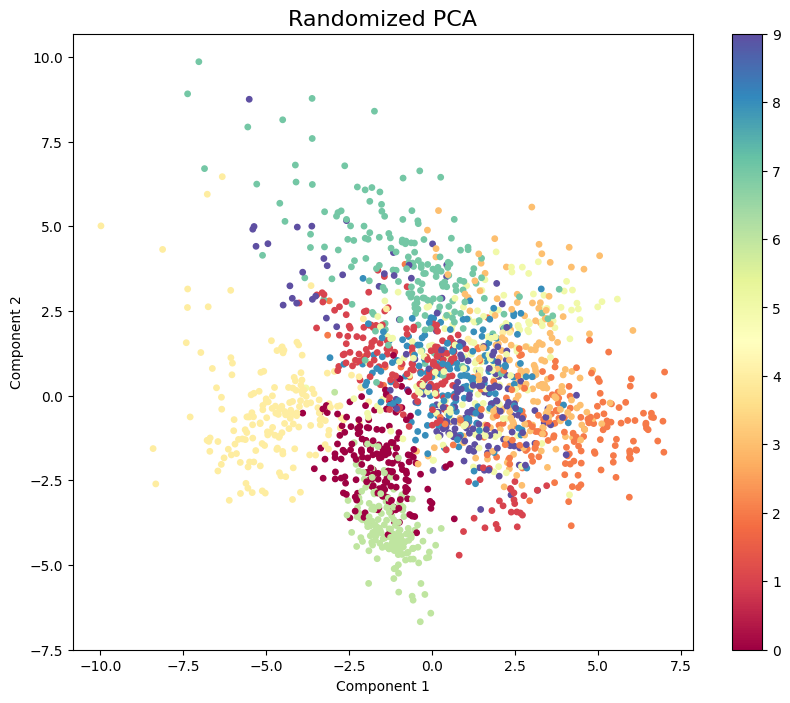

In [18]:

# 6. Randomized PCA
pca_randomized = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_pca_randomized = pca_randomized.fit_transform(X_scaled)
plot_2D(X_pca_randomized, y, "Randomized PCA")


Kernel PCA:

Extends PCA by applying a kernel trick, useful for non-linear data.
Shows clear separation of clusters when the kernel parameters are tuned well.
Computationally more intensive than standard PCA.

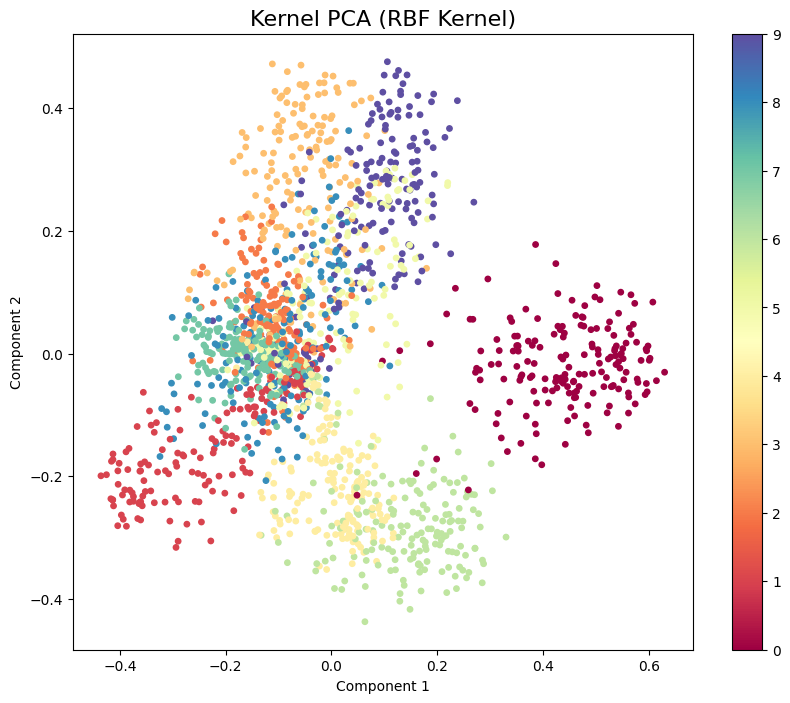

In [19]:

# 7. Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kpca = kernel_pca.fit_transform(X_scaled)
plot_2D(X_kpca, y, "Kernel PCA (RBF Kernel)")


Incremental PCA:

Suitable for large datasets and incremental updates.
Performance is similar to PCA but with less memory usage.
Works best for linearly separable data.

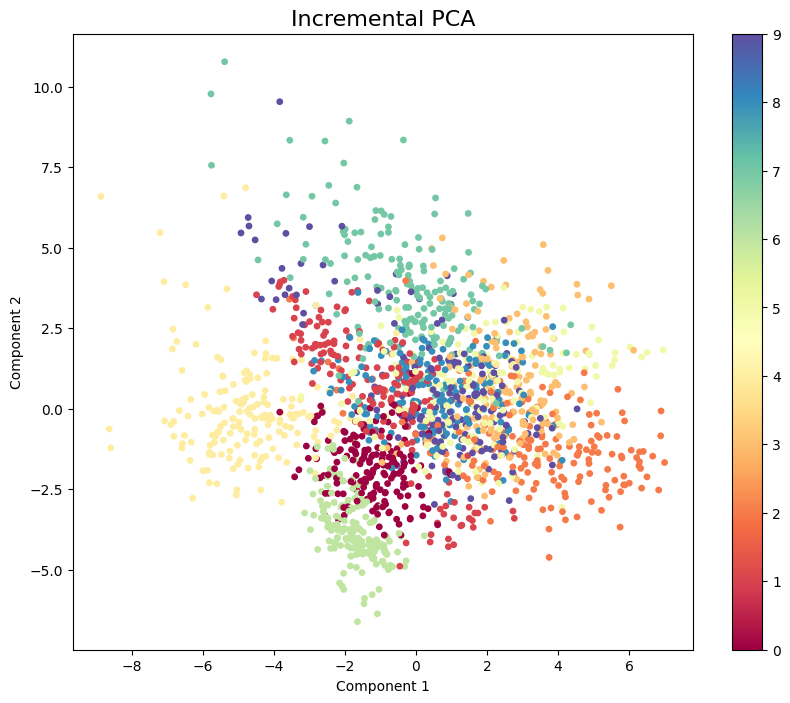

In [20]:

# 8. Incremental PCA
ipca = IncrementalPCA(n_components=2)
X_ipca = ipca.fit_transform(X_scaled)
plot_2D(X_ipca, y, "Incremental PCA")


Factor Analysis:

Models the variance structure, suitable for identifying latent variables.
Provides a linear projection, but results are less interpretable for non-linear structures.

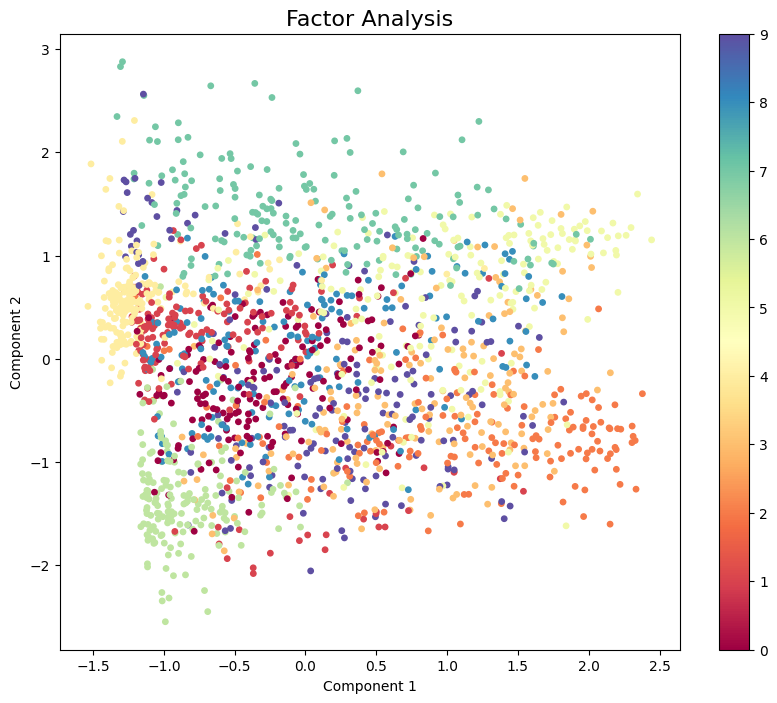

In [21]:

# 9. Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)
plot_2D(X_fa, y, "Factor Analysis")


Autoencoders:

Neural network-based technique for learning non-linear transformations.
Shows excellent performance in reducing dimensions for high-dimensional data.
Offers flexibility in learning complex patterns but requires more computational resources and training time.

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


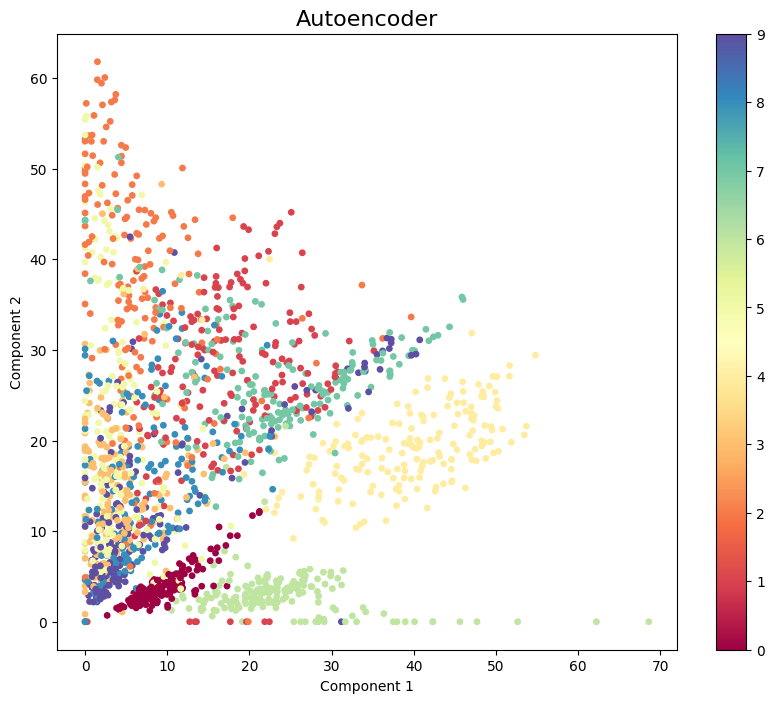

In [23]:

# 10. Autoencoders
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(2, activation='relu')(encoded)  # Latent space with 2 dimensions
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=0)

X_autoencoder = encoder.predict(X_scaled)
plot_2D(X_autoencoder, y, "Autoencoder")



#General Observations:
UMAP and t-SNE excel at preserving the cluster structure, making them ideal for visualization tasks.
LLE and Isomap are good for capturing non-linear structures but may struggle with scalability or noise.
MDS and Factor Analysis offer global structure preservation but are limited in revealing non-linear patterns.
PCA variants (Randomized and Incremental) perform well for linear data and are computationally efficient.
Autoencoders provide high flexibility and performance for non-linear structures but at the cost of computational complexity.

#Recommendations:
For quick visualization of high-dimensional data: Use UMAP or t-SNE.
For linear relationships and large datasets: Use Randomized PCA or Incremental PCA.
For deeper insights into non-linear data structures: Use Kernel PCA or Autoencoders.